# Practice: Un-supervised classification with a Gaussian Mixture Model
G. Maze, Ifremer / LOPS

IUEM, M2-POC, UE "Ocean’s Big Data Mining"

2018/02/20

See https://github.com/obidam/m2poc2018 for more

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tuto_tools import *

## Generate a dummy bi-dimensional dataset $D(x_1,x_2)$
We manually create a mixture of 3 bi-dimensional normal distributions

The dataset will have the following shape: $D\in R^{N\times2}$
where $N$ is the number of samples, and 2 the number of dimensions

For all plots to work fine, use a dataset where (x1,x2) in [-5,20]

In [2]:
# Mean vector and covariance matrix, cluster 1
N1 = 1000
Mu1  = [0, 0]
Cov1 = [[1, 0], [0, 1]] 
x1, y1 = np.random.multivariate_normal(Mu1, Cov1, (N1,)).T

# Mean vector and covariance matrix, cluster 2
N2 = 1500
Mu2  = [4, 5]
Cov2 = [[3, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(Mu2, Cov2, (N2,)).T

# Mean vector and covariance matrix, cluster 3
N3 = 2000
Mu3  = [8, 2]
Cov3 = [[4, 2], [0, 2]]  
x3, y3 = np.random.multivariate_normal(Mu3, Cov3, (N3,)).T

# Add them all:
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
D = np.array((x,y)).T
print "Shape of the dataset:", D.shape

Shape of the dataset: (4500, 2)


/home1/datahome/gmaze/conda-env/lopsformationdata/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.


Text(0,0.5,'dimension x2')

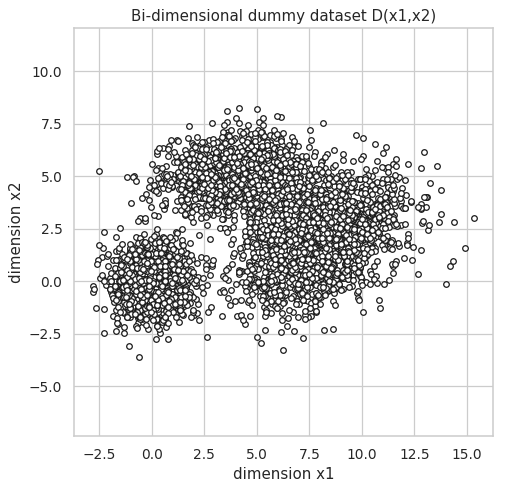

In [3]:
fig = plt.figure(figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111, title='Bi-dimensional dummy dataset D(x1,x2)')
plt.scatter(D[:,0],D[:,1], s=20, facecolor='w', edgecolor='k', marker='o')
plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')

## Compute and plot the observed density $p([x_1,x_2])$ of the bi-dimensional dataset

Use the numpy function

    numpy.histogram2d(x, y, bins=10, range=None, normed=False, weights=None)

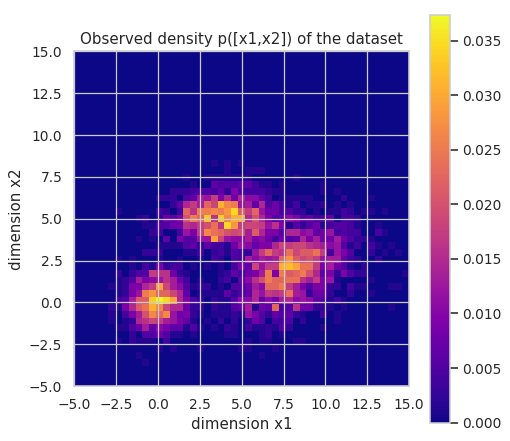

In [4]:
N = 50
x1 = np.linspace(-5, 15, N)
x2 = np.linspace(-5, 15, N)
H, xedges, yedges = np.histogram2d(D[:,0], D[:,1], bins=(x1,x2), density=True)
H = H.T  # Let each row list bins with common y range.

fig = plt.figure(figsize=(6, 6), dpi=90)
# ax = fig.add_subplot(111, 
plt.imshow(H, interpolation='nearest', origin='low', cmap='plasma', extent=[x1[0], x1[-1], x2[0], x2[-1]])
# plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')
plt.title('Observed density p([x1,x2]) of the dataset')
plt.colorbar()

## Compute and plot marginal densities $p(x_1)$ and $p(x_2)$ of the dataset

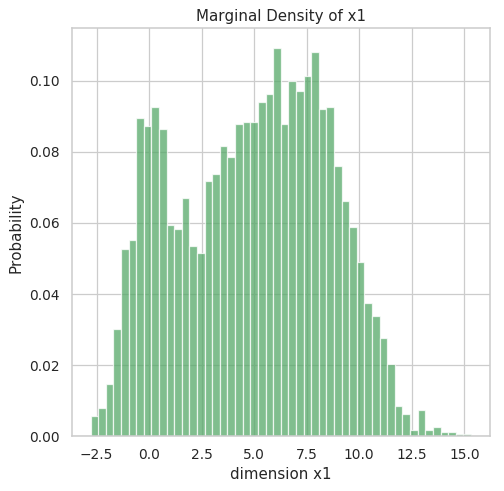

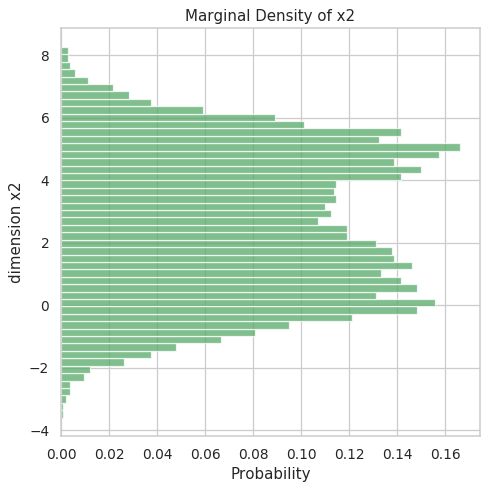

In [5]:
# One can also plot the marginal densities of the dummy dataset:
fig = plt.figure(figsize=(6, 6), dpi=90)
n, bins, patches = plt.hist(D[:,0], 50, density=1, facecolor='g', alpha=0.75)
plt.xlabel('dimension x1')
plt.ylabel('Probability')
plt.title('Marginal Density of x1')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(6, 6), dpi=90)
n, bins, patches = plt.hist(D[:,1], 50, density=1, facecolor='g', alpha=0.75, orientation= 'horizontal')
plt.ylabel('dimension x2')
plt.xlabel('Probability')
plt.title('Marginal Density of x2')
plt.grid(True)
plt.show()

## Compute and plot a conditional density $p(x_1|x_2)$ of the dataset

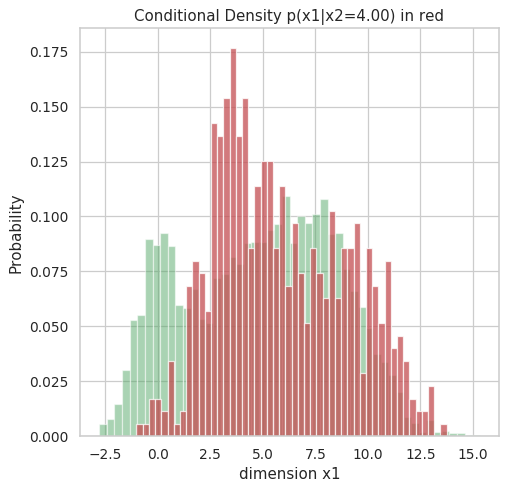

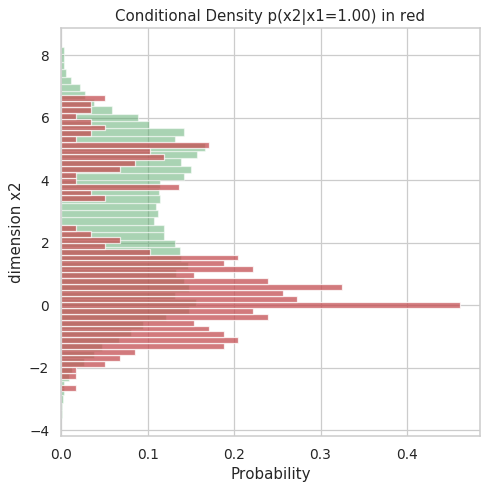

In [6]:
# Select x_2:
dx = 0.5
x_2 = 4
x_range = np.linspace(x_2-dx,x_2+dx,2)

# Slice the dataset along x_2
x_slice = D[np.where( (D[:,1]>=x_range[0]) & (D[:,1]<=x_range[1])),0]
 
# Compute and plot the density
fig = plt.figure(figsize=(6, 6), dpi=90) 
n, bins, patches = plt.hist(D[:,0], 50, density=1, facecolor='g', alpha=0.5)
n, bins, patches = plt.hist(x_slice[0,:], 50, density=1, facecolor='r', alpha=0.75)
plt.xlabel('dimension x1') 
plt.ylabel('Probability')
plt.title("Conditional Density p(x1|x2=%0.2f) in red"%(x_2))
plt.grid(True)
plt.show()

# Select x_1:
dx = 0.5
x_1 = 1
x_range = np.linspace(x_1-dx,x_1+dx,2)

# Slice the dataset along x_1
x_slice = D[np.where( (D[:,0]>=x_range[0]) & (D[:,0]<=x_range[1])),1]

# Compute and plot the density
fig = plt.figure(figsize=(6, 6), dpi=90)
n, bins, patches = plt.hist(D[:,1], 50, density=1, facecolor='g', alpha=0.5, orientation= 'horizontal')
n, bins, patches = plt.hist(x_slice[0,:], 50, density=1, facecolor='r', alpha=0.75, orientation= 'horizontal')
plt.ylabel('dimension x2')
plt.xlabel('Probability')
plt.title("Conditional Density p(x2|x1=%0.2f) in red"%(x_1))
plt.grid(True)
plt.show()

## Fit a GMM to the dummy dataset

In [7]:
# Fix the number of clusters to look for:
K = 3

In [8]:
from sklearn import mixture

# Initialize the GMM:
gmm = mixture.GaussianMixture(n_components=K)
# gmm = mixture.GaussianMixture(n_components=K,init_params='random')

# Fit the GMM onto the dataset:
gmm = gmm.fit(D)

# Print final log-likelihood of the dataset:
print "Final log-likelihood:", gmm.score(D)

# Print optimized parameters of the modes:
k=0
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    print "\nMode/Class/Component/Cluster ID#", k
    print "Center:\n", pos    
    print "Covariance:\n", covar
    print "Weight (prior):\n", w 
    k = k+1

Final log-likelihood: -4.461465295832455

Mode/Class/Component/Cluster ID# 0
Center:
[7.99129095 1.95930571]
Covariance:
[[3.68581975 1.18298827]
 [1.18298827 2.48904514]]
Weight (prior):
0.44768787551738404

Mode/Class/Component/Cluster ID# 1
Center:
[-0.00351654  0.04776905]
Covariance:
[[1.01625399 0.03367431]
 [0.03367431 1.07162971]]
Weight (prior):
0.2223554170540415

Mode/Class/Component/Cluster ID# 2
Center:
[3.96639803 5.029593  ]
Covariance:
[[2.93833684 0.09610237]
 [0.09610237 0.90033488]]
Weight (prior):
0.32995670742857613


# Once the GMM is fitted, one can predict classes

In [19]:
# Get the posteriors:
posts = gmm.predict_proba(D)
# posts is of shape: (n_samples, n_components)
print "Shape of the posteriors matrix:", posts.shape

# Get the class maximising the posteriors (hard classif):
# labels = np.argmax(posts,axis=1) # similar to gmm.predict !
labels = gmm.predict(D)
# labels is of shape: (n_samples, )
print "Shape of the labels matrix:",  labels.shape

# Compute robustness of the classification:
robust = (np.max(posts,axis=1) - 1./K)*K/(K-1.)
Plist = [0, 0.33, 0.66, 0.9, .99, 1];
rowl0 = ('Unlikely','As likely as not','Likely','Very Likely','Virtually certain')
robust_id = np.digitize(robust, Plist)-1

i_sample = np.random.randint(0,high=D.shape[0],size=(1,))
print "\nExample of data for sample:", i_sample[0]
print "Posteriors:", np.round(posts[i_sample,:]*100,2), "in %"
print "Sum of the posteriors:", np.sum(posts[i_sample,:])
print "Class id of the sample:", labels[i_sample]
print "Robustness of the classification:", round(robust[i_sample[0]]*100,2), "%, i.e. ", rowl0[robust_id[i_sample[0]]]

Shape of the posteriors matrix: (4500, 3)
Shape of the labels matrix: (4500,)

Example of data for sample: 1053
Posteriors: [[8.000e-02 0.000e+00 9.992e+01]] in %
Sum of the posteriors: 0.9999999999999999
Class id of the sample: [2]
Robustness of the classification: 99.88 %, i.e.  Virtually certain


# Visualise clustering results

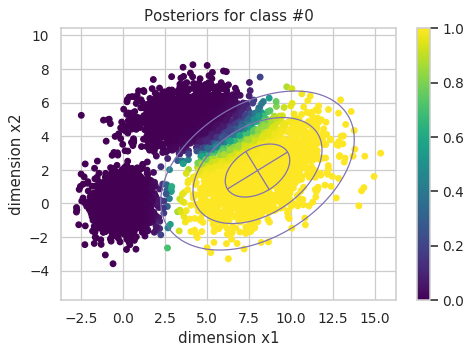

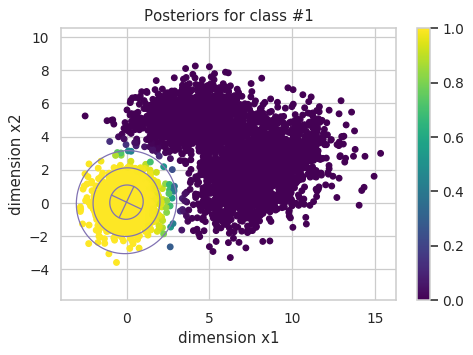

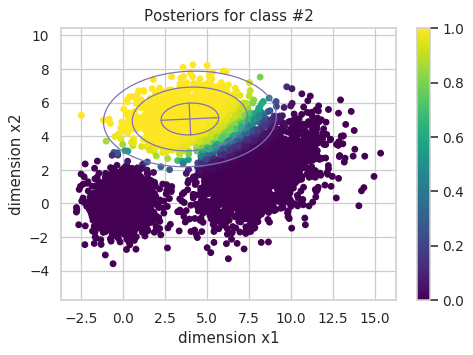

In [22]:
# Plot the posteriors:
for ik in np.arange(K):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=90, facecolor='w', edgecolor='k')

    sc = ax.scatter(D[:, 0], D[:, 1], c=posts[:,ik], s=20, cmap='viridis', vmin=0., vmax=1.)
    plt.axis('equal')
    plt.xlabel('dimension x1')
    plt.ylabel('dimension x2')
    plt.title("Posteriors for class #%i"%(ik))
    plt.grid(True)
    plt.colorbar(sc)
    p,ax=plot_GMMellipse(gmm,ik,'m',ax,label="Class-%i"%(ik),linewidth=1,std=[1,2,3])
    plt.show()

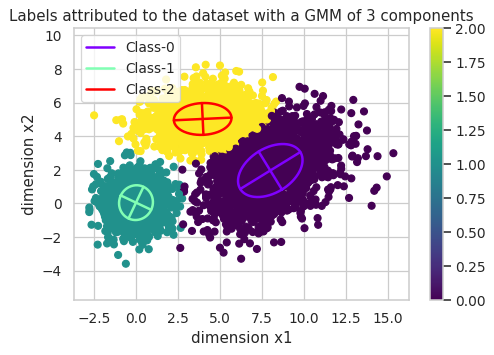

In [23]:
# Plot the labels:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=90, facecolor='w', edgecolor='k')
sc = plt.scatter(D[:, 0], D[:, 1], c=labels, s=30, cmap='viridis', vmin=0, vmax=K-1)
plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')
plt.title("Labels attributed to the dataset with a GMM of %i components"%(K))
plt.grid(True)
plt.colorbar(sc)
colors = iter(plt.cm.rainbow(np.linspace(0, 1, K)))
for ik in np.arange(K):
    a,a = plot_GMMellipse(gmm,ik,next(colors),ax,label="Class-%i"%(ik),linewidth=2)
ax.legend(loc='upper left')
plt.show()

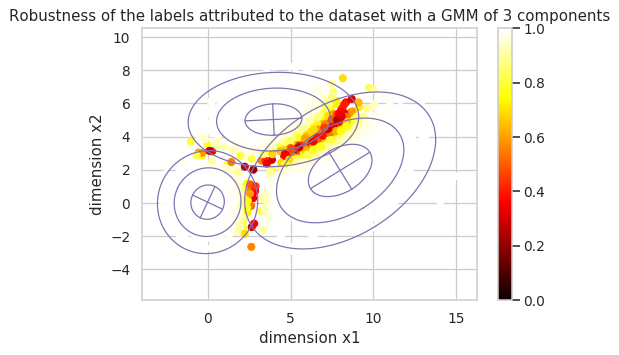

In [24]:
# Plot the robustness:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=90, facecolor='w', edgecolor='k')
sc = plt.scatter(D[:, 0], D[:, 1], c=robust, s=30, cmap='hot', vmin=0., vmax=1.)
plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')
plt.title("Robustness of the labels attributed to the dataset with a GMM of %i components"%(K))
plt.grid(True)
plt.colorbar(sc)
for ik in np.arange(K):
    a,a = plot_GMMellipse(gmm,ik,'m',ax,label="Class-%i"%(ik),linewidth=1,std=[1,2,3])
plt.show()

# Classify new data

We will now classify the entire plan

In [26]:
#
N = 100
x1, x2 = np.linspace(-5, 20, N), np.linspace(-5, 20, N)
X,Y = np.meshgrid(x1,x2)
X,Y = np.ravel(X), np.ravel(Y)
D2 = np.array((X,Y)).T
print "Shape of the new dataset (gridded plan):", D2.shape

# Get the posteriors:
posts2 = gmm.predict_proba(D2)

# Get the class maximising the posteriors (hard classif):
labels2 = gmm.predict(D2)

# Compute robustness of the classification:
robust2 = (np.max(posts2,axis=1) - 1./K)*K/(K-1.)

Shape of the new dataset (gridded plan): (10000, 2)


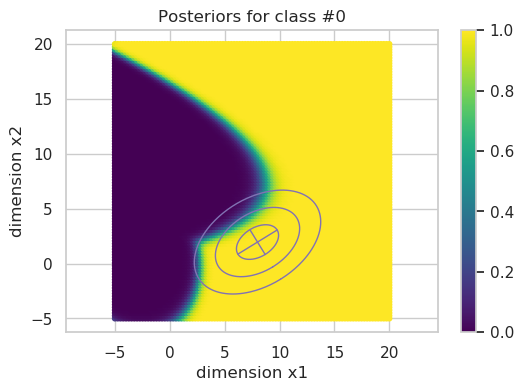

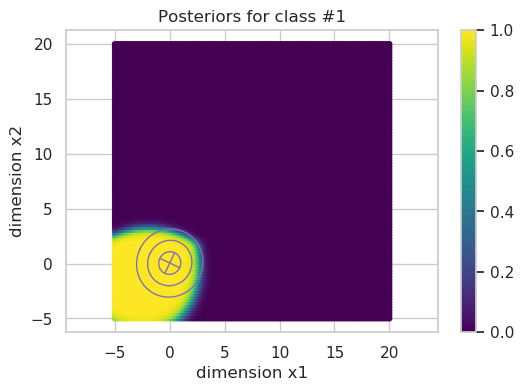

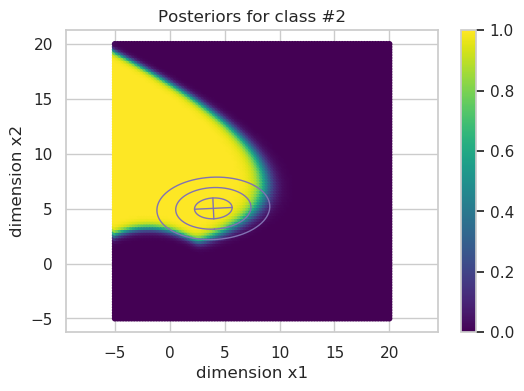

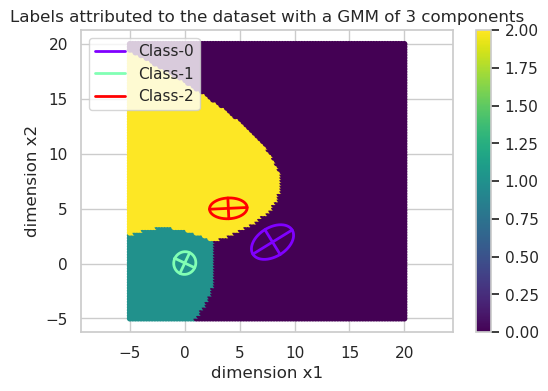

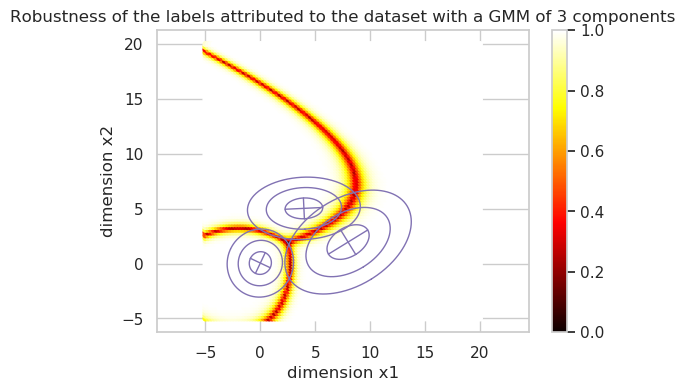

In [27]:
# Plot the posteriors:
for ik in np.arange(K):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, facecolor='w', edgecolor='k', sharey=True)

    sc = ax.scatter(D2[:, 0], D2[:, 1], c=posts2[:,ik], s=20, cmap='viridis', vmin=0., vmax=1., edgecolor='')
    plt.axis('equal')
    plt.xlabel('dimension x1')
    plt.ylabel('dimension x2')
    plt.title("Posteriors for class #%i"%(ik))
    plt.grid(True)
    plt.colorbar(sc)
    p,ax=plot_GMMellipse(gmm,ik,'m',ax,label="Class-%i"%(ik),linewidth=1,std=[1,2,3])
    plt.show()

# Plot the labels:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, facecolor='w', edgecolor='k')
sc = plt.scatter(D2[:, 0], D2[:, 1], c=labels2, s=20, cmap='viridis', vmin=0., vmax=K-1., edgecolor='')
plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')
plt.title("Labels attributed to the dataset with a GMM of %i components"%(K))
plt.grid(True)
plt.colorbar(sc)
colors = iter(plt.cm.rainbow(np.linspace(0, 1, K)))
for ik in np.arange(K):
    a,a = plot_GMMellipse(gmm,ik,next(colors),ax,label="Class-%i"%(ik),linewidth=2)
ax.legend(loc='upper left')
plt.show()

# Plot the robustness:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, facecolor='w', edgecolor='k')
sc = plt.scatter(D2[:, 0], D2[:, 1], c=robust2, s=20, cmap='hot', vmin=0., vmax=1., edgecolor='')
plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')
plt.title("Robustness of the labels attributed to the dataset with a GMM of %i components"%(K))
plt.grid(True)
plt.colorbar(sc)
for ik in np.arange(K):
    a,a = plot_GMMellipse(gmm,ik,'m',ax,label="Class-%i"%(ik),linewidth=1,std=[1,2,3])
plt.show()

# More exercices on GMM

## Compare the GMM and the observed P(x), P(x1), P(x2), P(x1|x2), P(x2|x1)

Make plots to compare the PDF of the dataset with its modelled version from the GMM 

- Compare the 2-dimensional PDF
- Compare the marginal PDFs
- Compare the conditional PDFs

## Determine the optimal number of classes using the BIC
The BIC is directly implemented within scikit learn class method:
    
       gmm.bic(X)
       
returns the Bayesian information criterion for the current model on the input X.

## Test different shapes for the co-variance matrix
Using the gmm option: 
    
    covariance_type : {‘full’, ‘diag’, ‘spherical’}

## Change the number of sample in each of the imposed clusters

Play with the number of samples

- what happens if all clusters have the same number of points ?
- what happens if 1 cluster has much more points than all the others ?

In [ ]:
# This is real case dataset to play with:
import xarray as xr
ds = xr.open_dataset('http://www.ifremer.fr/opendap/cerdap1/ghrsst/l4/glob/odyssea-nrt/data/2010/242/20100830-IFR-L4_GHRSST-SSTfnd-ODYSSEA-GLOB_010-v2.0-fv1.0.nc')
print ds